In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('athlete_events.csv')

In [3]:
# df['Medal'].fillna('None', inplace = True)
# df_medals = df.loc[df['Medal'] != 'None']

1. Plot a stacked bar chart showing the distribution of medals for the top 10 countries with the most medals.

In [4]:
df_medals = df[df["Medal"].notna()]

In [5]:
medals = df_medals.groupby(["NOC", "Medal"]).size().unstack(fill_value=0)
medals["Total"] = medals.sum(axis=1)
topcountries = medals.sort_values(by = "Total", ascending=False).head(10)
topcountries = topcountries.drop(columns=["Total"])
topcountries = topcountries[['Bronze', 'Silver', 'Gold']]
topcountries

Medal,Bronze,Silver,Gold
NOC,,,
USA,1358,1641,2638
URS,689,732,1082
GER,746,674,745
GBR,651,739,678
FRA,666,610,501
ITA,531,531,575
SWE,535,522,479
CAN,451,438,463
AUS,517,455,348


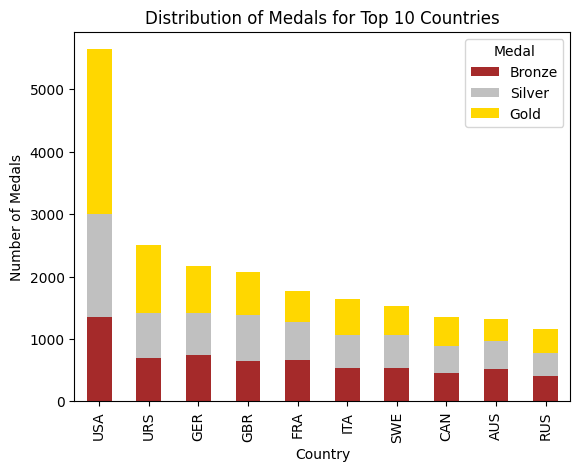

In [6]:
topcountries.plot(kind = 'bar', stacked = True, color=['brown', 'silver', 'gold'])
plt.title('Distribution of Medals for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.show()

2. Create separate histograms to visualize the age distribution of male and female athletes.

In [7]:
gen = df.groupby('Sex')['Age']
gen.size()

Sex
F     74522
M    196594
Name: Age, dtype: int64

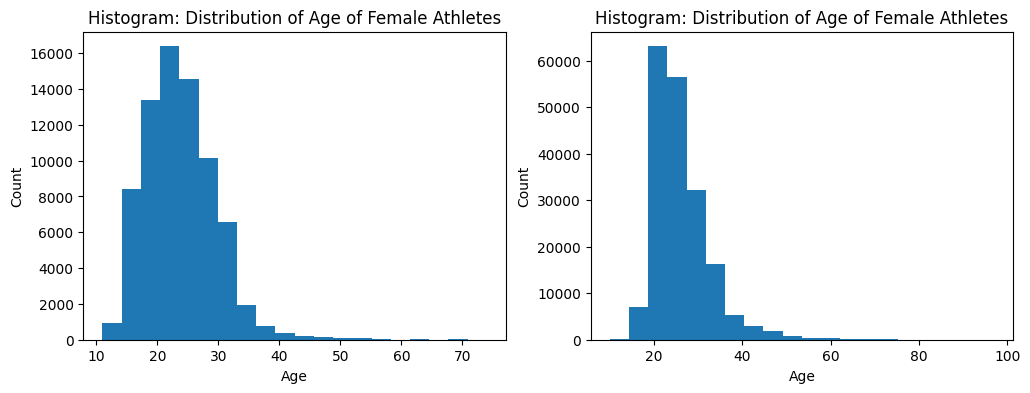

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(gen.get_group('F'), bins = 20)
plt.title('Histogram: Distribution of Age of Female Athletes')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(gen.get_group('M'), bins = 20)
plt.title('Histogram: Distribution of Age of Female Athletes')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

3. Identify and list the top 10 athletes with the most medals.

In [9]:
athletes = df.groupby('Name')['Medal'].count().sort_values(ascending=False)
athletes.head(10)

Name
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Edoardo Mangiarotti                   13
Ole Einar Bjrndalen                   13
Borys Anfiyanovych Shakhlin           13
Takashi Ono                           13
Birgit Fischer-Schmidt                12
Aleksey Yuryevich Nemov               12
Paavo Johannes Nurmi                  12
Name: Medal, dtype: int64

4. Plot boxplots to compare the height distribution across different sports.

In [10]:
df_height = df.dropna(subset=['Height'])

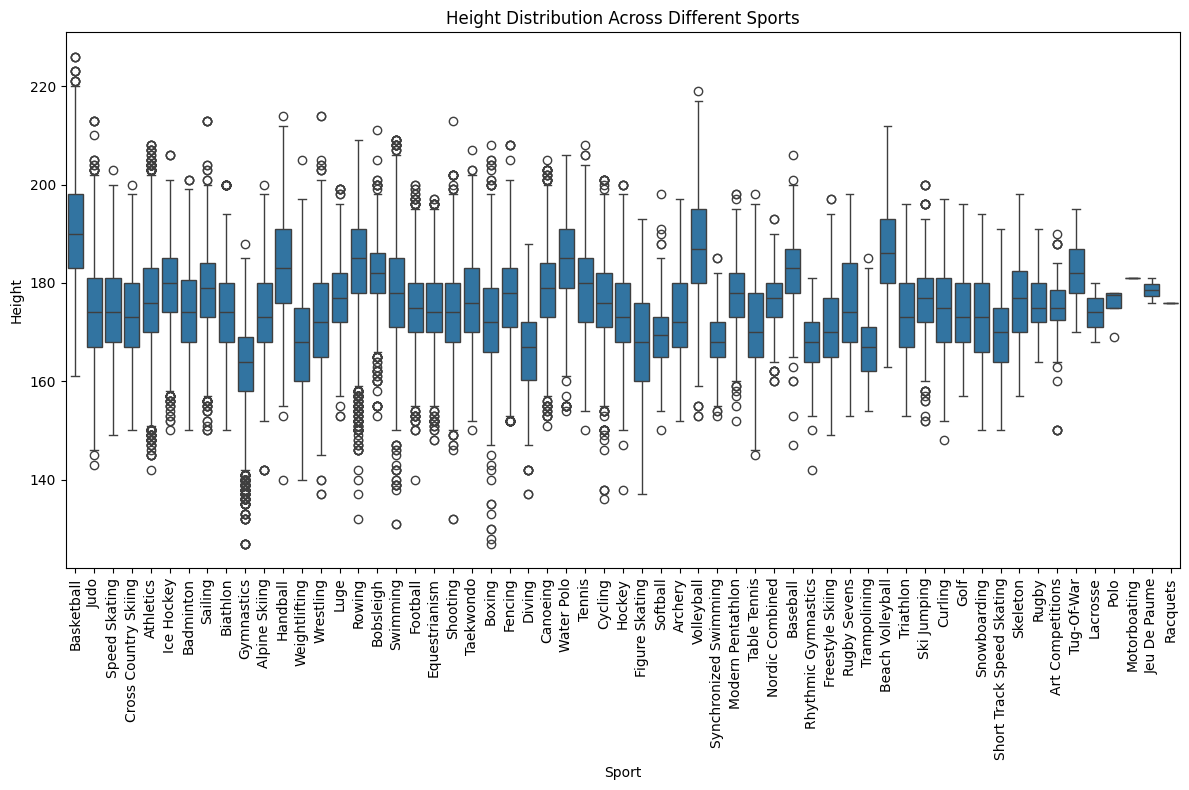

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Sport', y='Height', data=df_height)
plt.xticks(rotation=90)
plt.xlabel("Sport")
plt.ylabel("Height")
plt.title("Height Distribution Across Different Sports")
plt.tight_layout()
plt.show()

5. Plot boxplots to compare the weight distribution across different sports.

In [12]:
df_weight = df.dropna(subset=['Weight'])

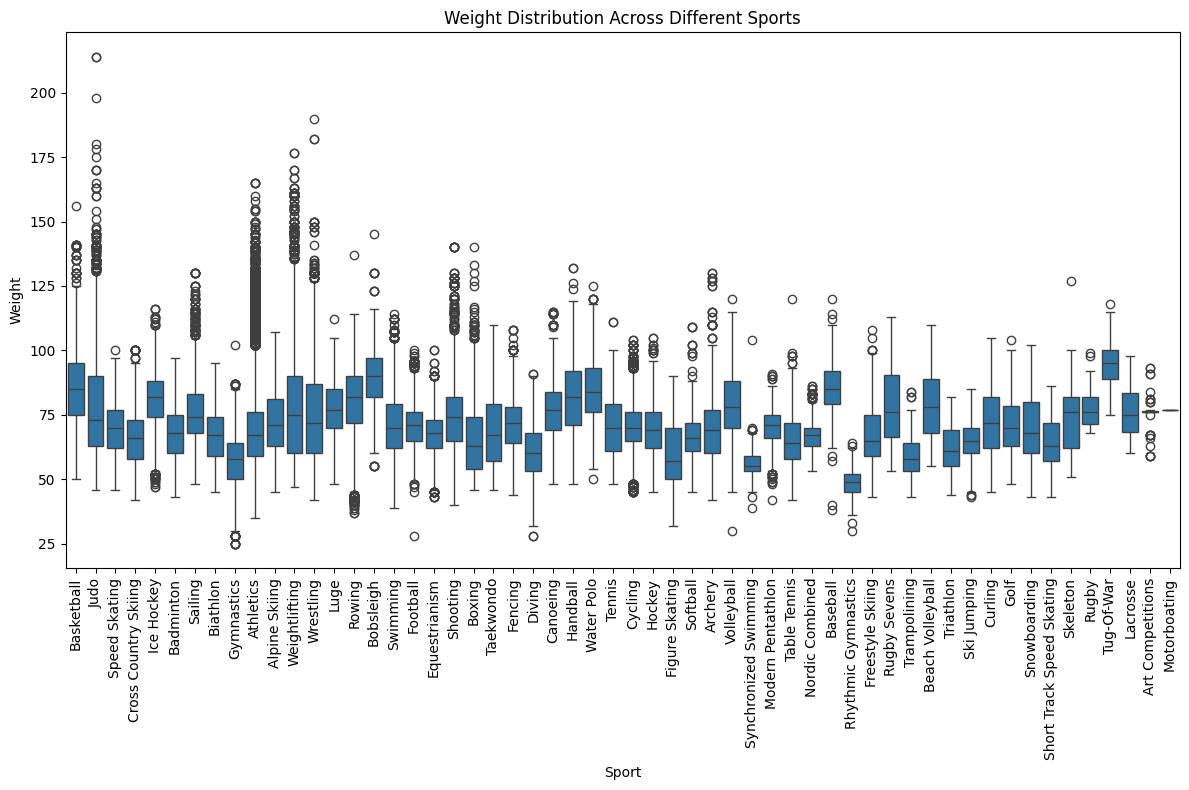

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Sport', y='Weight', data=df_weight)
plt.xticks(rotation=90)
plt.xlabel("Sport")
plt.ylabel("Weight")
plt.title("Weight Distribution Across Different Sports")
plt.tight_layout()
plt.show()

6. Compare the number of athletes participating in Summer and Winter Olympics using a bar chart.

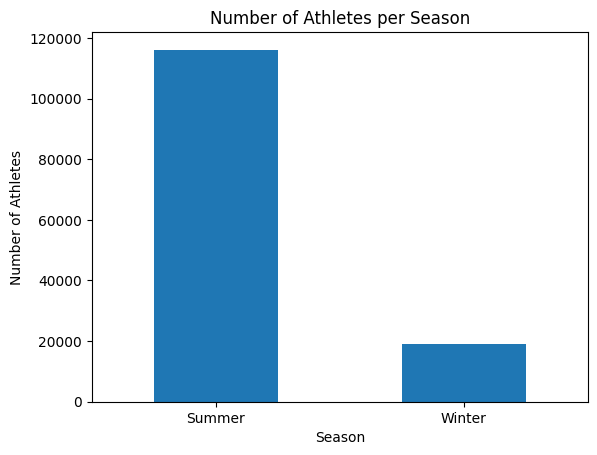

In [14]:
season_athletes = df.groupby("Season")["Name"].nunique()

season_athletes.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes per Season')
plt.xticks(rotation=0)
plt.show()

7. Create a heatmap to visualize the distribution of medals across different sports.

In [15]:
sport_medals = df_medals.groupby(["Sport", "Medal"]).size().unstack(fill_value=0)
sport_medals.head()

Medal,Bronze,Gold,Silver
Sport,,,
Aeronautics,0,1,0
Alpine Skiing,141,143,144
Alpinism,0,25,0
Archery,98,135,120
Art Competitions,51,49,56


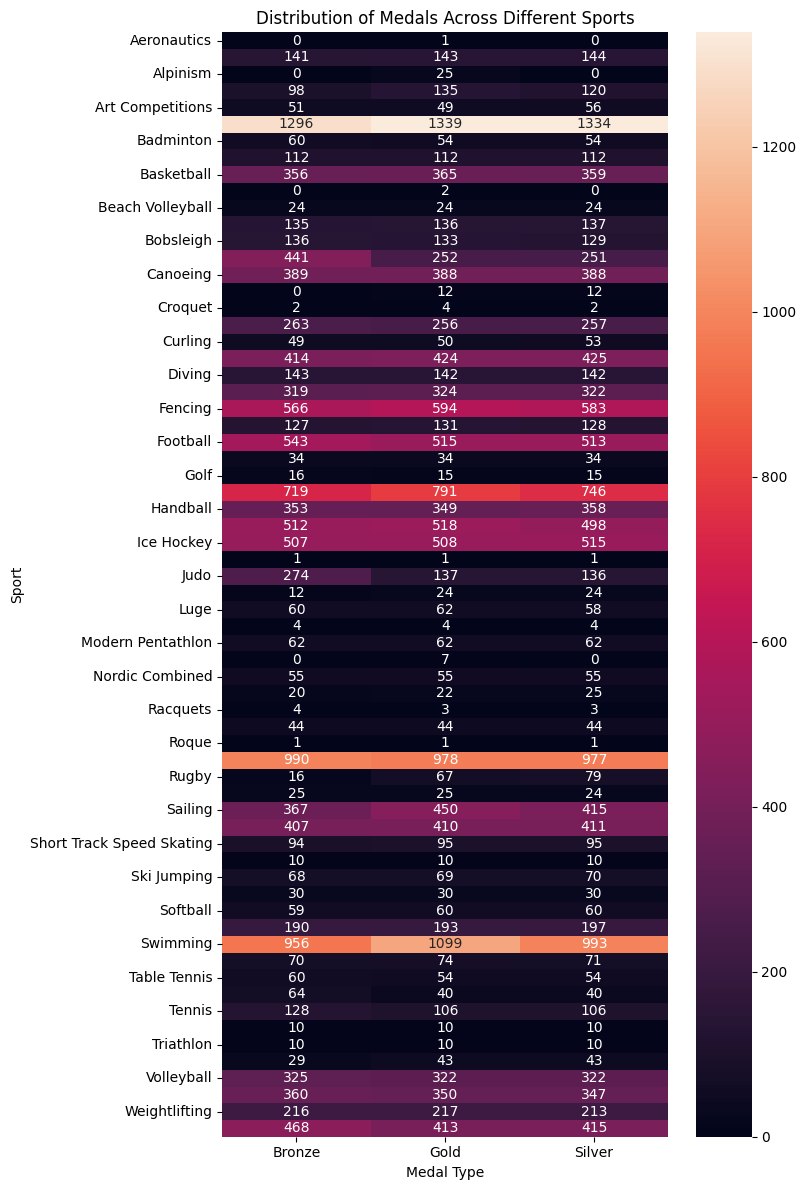

In [16]:
plt.figure(figsize=(8, 12))
sns.heatmap(sport_medals, annot=True, fmt="d")
plt.title("Distribution of Medals Across Different Sports")
plt.xlabel("Medal Type")
plt.ylabel("Sport")
plt.tight_layout()
plt.show()

8. Analyze the performance of the top 5 teams over the years using line charts.

In [17]:
topteams = df_medals.groupby(["Team", "Year"]).size().unstack(fill_value=0)
topteams["Total"] = topteams.sum(axis=1)
top5 = topteams.sort_values(by = "Total", ascending=False).head(5)
top5 = top5.drop(columns=["Total"])
top5

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Team,,,,,,,,,,,,,,,,,,,,,
United States,20,45,199,24,65,107,194,186,92,190,...,30,240,70,259,48,309,89,238,52,256
Soviet Union,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Germany,31,2,15,30,19,39,0,0,77,53,...,34,116,49,147,44,96,42,92,32,157
Great Britain,7,22,2,31,167,128,101,82,59,33,...,4,52,6,55,1,81,1,122,10,145
France,11,75,1,45,36,23,134,109,46,42,...,13,64,13,53,15,77,14,78,18,96


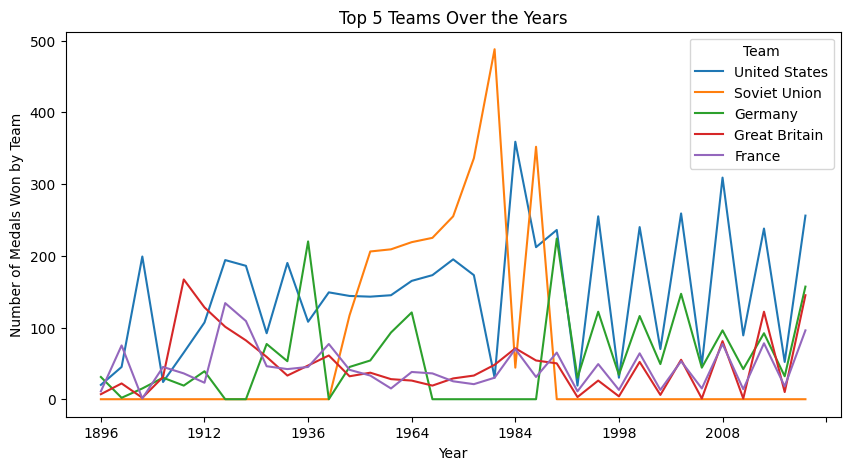

In [18]:

top5_transposed = top5.T

top5_transposed.plot(kind='line', figsize=(10, 5))
plt.title('Top 5 Teams Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals Won by Team')
plt.show()

9. Plot a line chart to show how the average age of athletes has changed over the years.

In [19]:
avgage = df.groupby("Year")["Age"].mean()

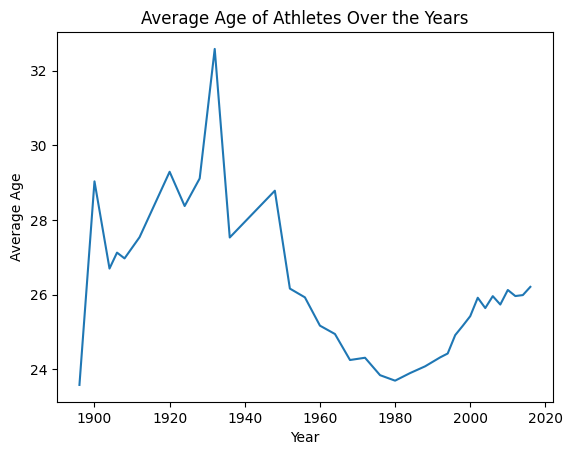

In [20]:
avgage.plot(kind = "line")
plt.title("Average Age of Athletes Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Age")
plt.show()

10. Identify the top 5 most popular events based on the number of athletes participating.

In [21]:
events = df.groupby('Event')['Name'].nunique().sort_values(ascending=False)
events.head(5)

Event
Football Men's Football                5427
Ice Hockey Men's Ice Hockey            3384
Hockey Men's Hockey                    2819
Basketball Men's Basketball            2480
Cycling Men's Road Race, Individual    2467
Name: Name, dtype: int64